# *TLC project by Gururaj Athani* 

## **Project Goal**

Develop regression model that helps estimate taxi fares before the ride based on the data TLC has gathered

## **Project Oraganization**

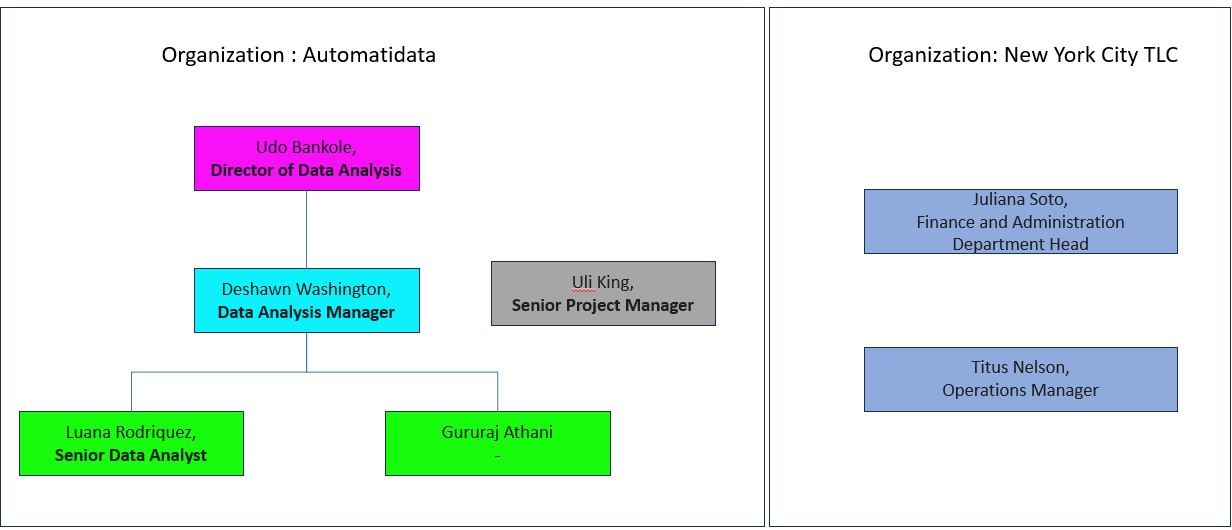

## **PACE - PLAN ANALYZE CONSTRUCT EXECUTE** 

### **PLAN_Task 1: High Level Planning Document: TLC Project strategy**

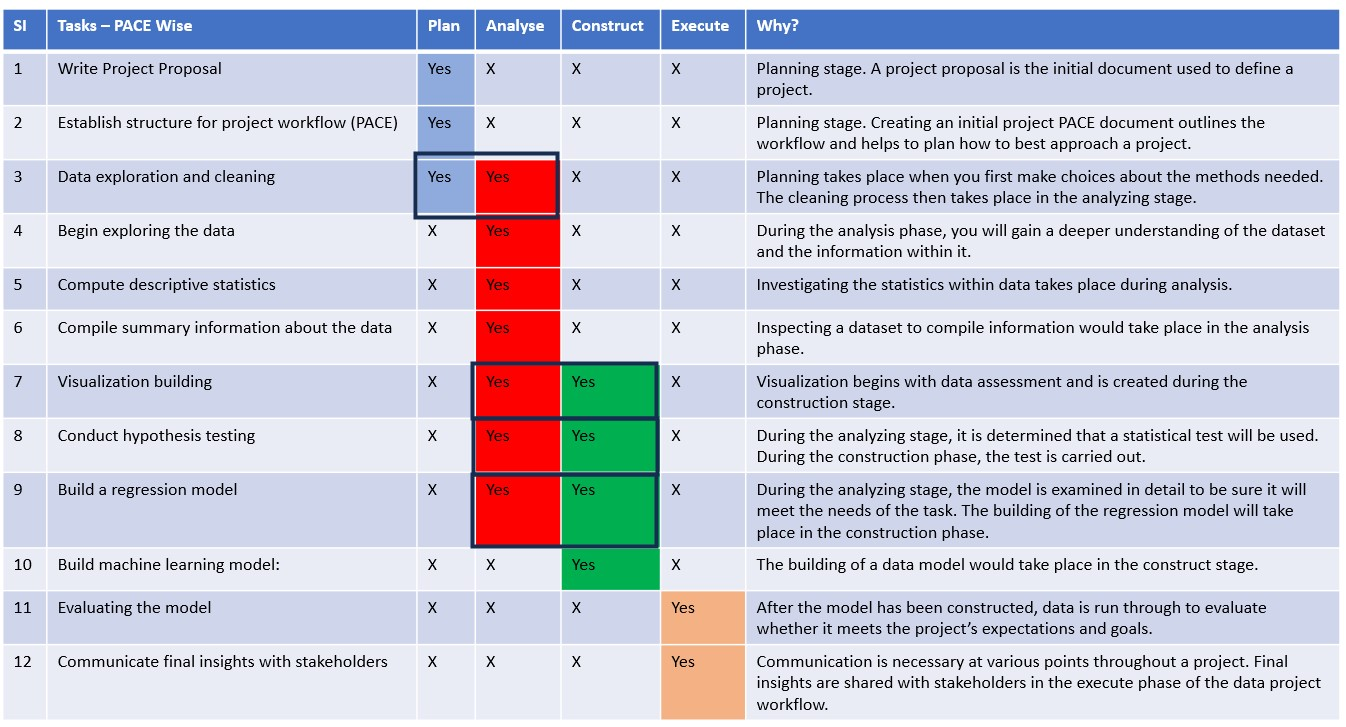

### **PLAN_Task 2: TLC Projet Proposal**

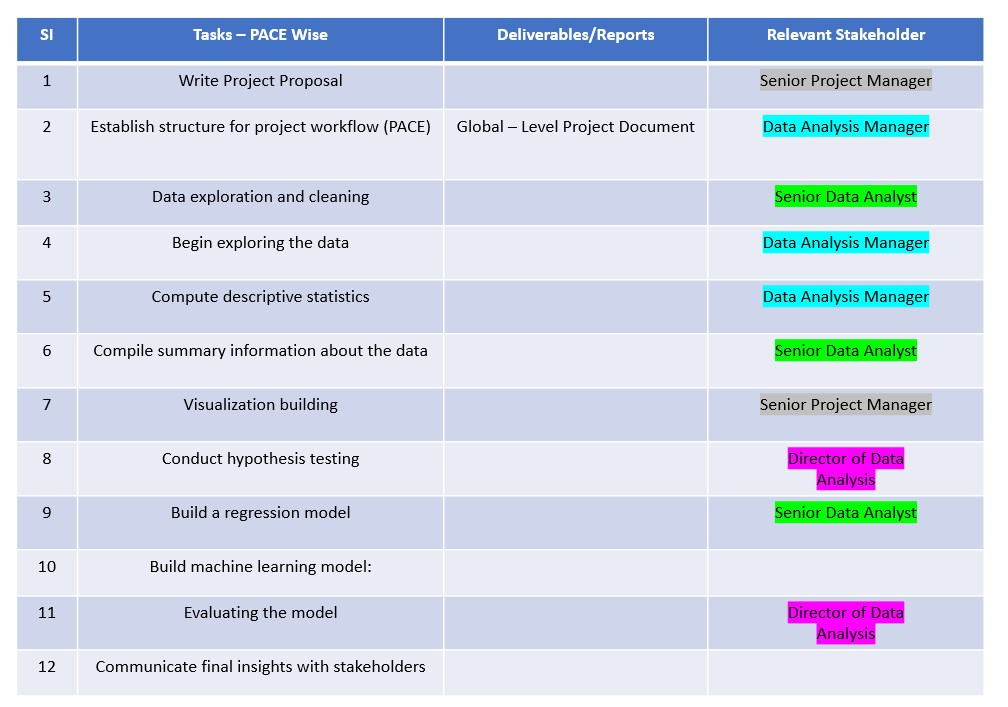

### **EXECUTE_Task  1: Communicate project introduction to Team and Stakeholders**

Share the Project Organization, Proposal and the starategy to the team.

### **PLAN_Task     3: Frame the Problem**

New York City - TLC (Taxi Limousine) company would like to use its Old unused data to make a useful solution, i.e. 
  - Make a Performance Dashboards
  - Customer Facing Tools
  - Strategic Business Insights

This could mean: 
1. Create a model that could predict the fare for a ride before it starts
2. Visulazations dashboard
3. other insights which could help business decisions in future.

### **PLAN_Task 4: Imports and Data Loading**

In [1]:
#Import libraries and packages listed above
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as OLS
import datetime


# Load dataset into dataframe
df = pd.read_csv('data\\2017_Yellow_Taxi_Trip_Data.csv')
print("done")

done


### **ANALYZE_Task 1: Build Dataframe**

#Display first 10 rows
df.head(10)

### **ANALYZE_Task 2: Understand the data - Investigate the variables**


- Understand the Data
1. Shape,
2. info()
3. describe()

- Understand variables
1. Identify categorical variables.
2. Identify contenuous variables.


In [2]:
print(df.shape)
print(df.info())
print(df.describe())

(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

Variables
  1. VendorID               Categorical Variable
  2. RatecodeID             Categorical Variable
  3. store_and_fwd_flag     Categorical Variable
  4. PULocationID           Discrete Variable
  5. DOLocationID           Discrete Variable
  6. payment_type           Categorical Variable  
  7. passenger_count        Categorical Variable  
 
  1. tpep_pickup_datetime   Continuous Variable
  2. tpep_dropoff_datetime  Continuous Variable
  3. trip_distance          Continuous Variable
  4. fare_amount            Continuous Variable
  5. extra                  Continuous Variable
  6. mta_tax                Continuous Variable
  7. tip_amount             Continuous Variable
  8. tolls_amount           Continuous Variable
  9. improvement_surcharge  Continuous Variable
  10. total_amount           Continuous Variable

### **EXECUTE_Task 1: Understand the Data**

Recomendataions for data after initial analyis
1) Datatype update:
- tpep_pickup_datetime : convert to datetime variable
- tpep_dropoff_datetime : convert to datetime variable
    
    
2) Add a new variable , 
- Ride duration by subtarcting the tpep_pickup_datetime from tpep_dropoff_datetime

### **PLAN_Task 5: Data Exploration and Cleaning**

Cleaning
- Use dropna() to remove the rows with empty cells

Uderstand the data by plotting.
- Box Plot  - Find the outliers
- Histogram - Understand the distribution
- Bar Plot  - For Time Series analysis - Montly, Daily , Hourly

### **ANALYZE_Task 3: Data Exploration and Cleaning**

#### ***Data Cleaning***

In [3]:
print(df.shape)
df.dropna(inplace=True)
print(df.dropna().shape)

(22699, 18)
(22699, 18)


#### ***Continuous variable analysis***

Data Exploration by visualization

<Axes: xlabel='tip_amount', ylabel='Count'>

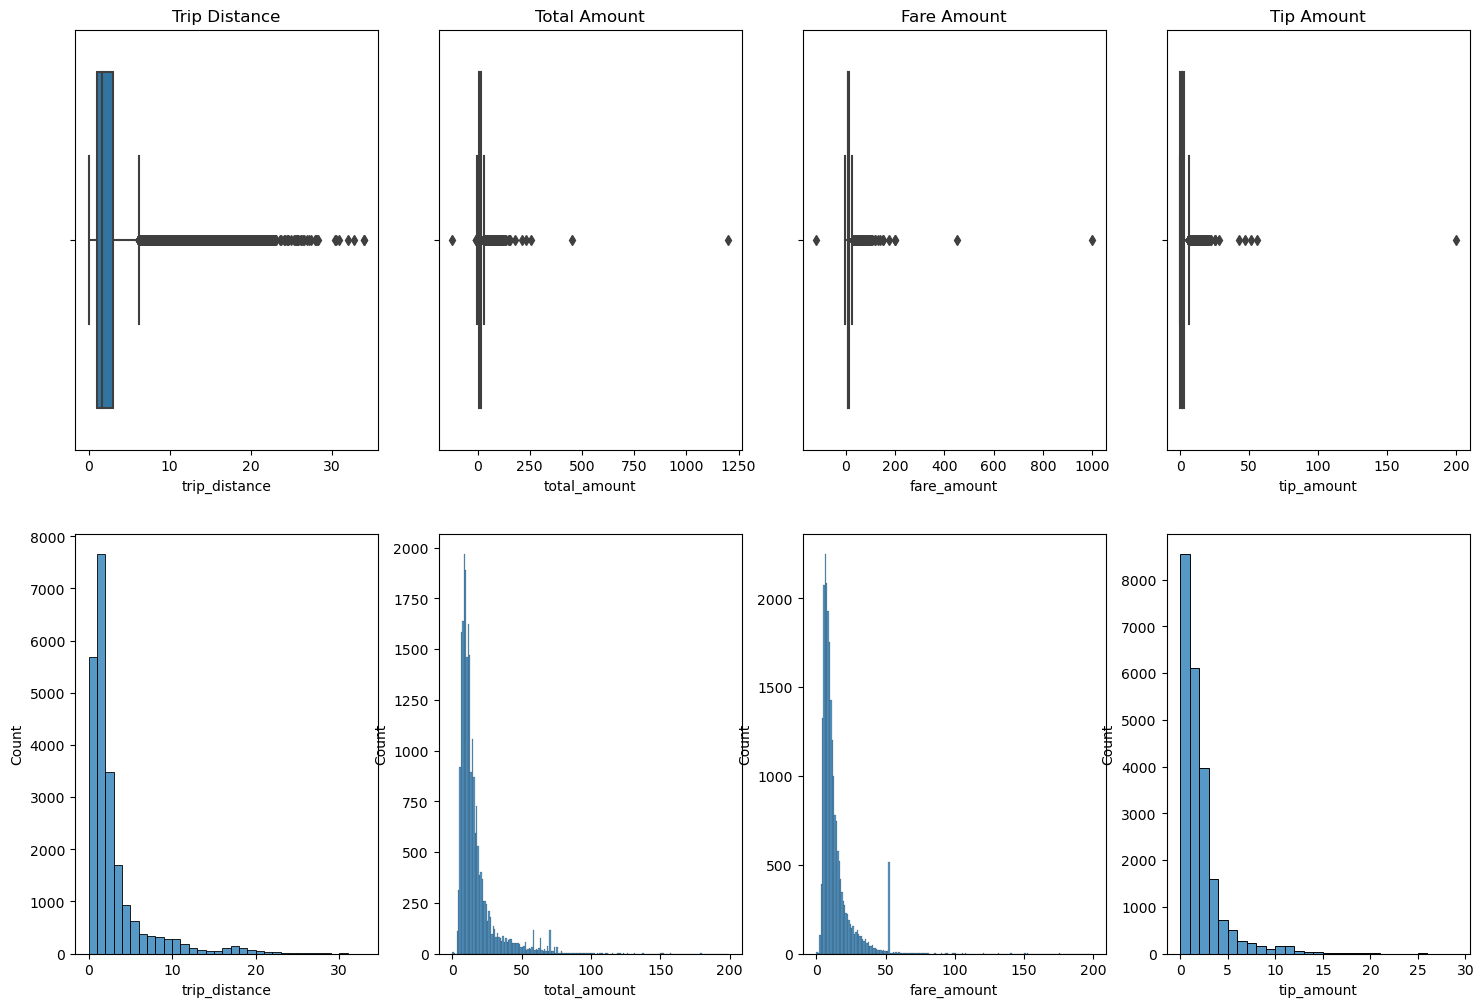

In [4]:
#Box Plots for some variables
fig, axes = plt.subplots(2, 4, figsize = (18,12))

sns.boxplot(ax=axes[0,0],x=df['trip_distance'])
axes[0,0].set_title('Trip Distance')

sns.boxplot(ax=axes[0,1],x=df['total_amount'])
axes[0,1].set_title('Total Amount')

sns.boxplot(ax=axes[0,2],x=df['fare_amount'])
axes[0,2].set_title('Fare Amount')

sns.boxplot(ax=axes[0,3],x=df['tip_amount'])
axes[0,3].set_title('Tip Amount')

#Distribution for some variables
sns.histplot(ax=axes[1,0],x=df['trip_distance'],bins=range(0,34,1))
#axes[1,0].set_title('Trip Distance distribution')

sns.histplot(ax=axes[1,1],x=df['total_amount'],bins=range(0,200,1))
#axes[1,1].set_title('Total Amount distribution')

sns.histplot(ax=axes[1,2],x=df['fare_amount'],bins=range(0,200,1))
#axes[1,2].set_title('Fare Amount distribution')

sns.histplot(ax=axes[1,3],x=df['tip_amount'],bins=range(0,30,1))
#axes[1,3].set_title('Tip Amount distribution')


#### ***Categorical and Continuous variable analysis***

<Axes: xlabel='tip_amount', ylabel='Count'>

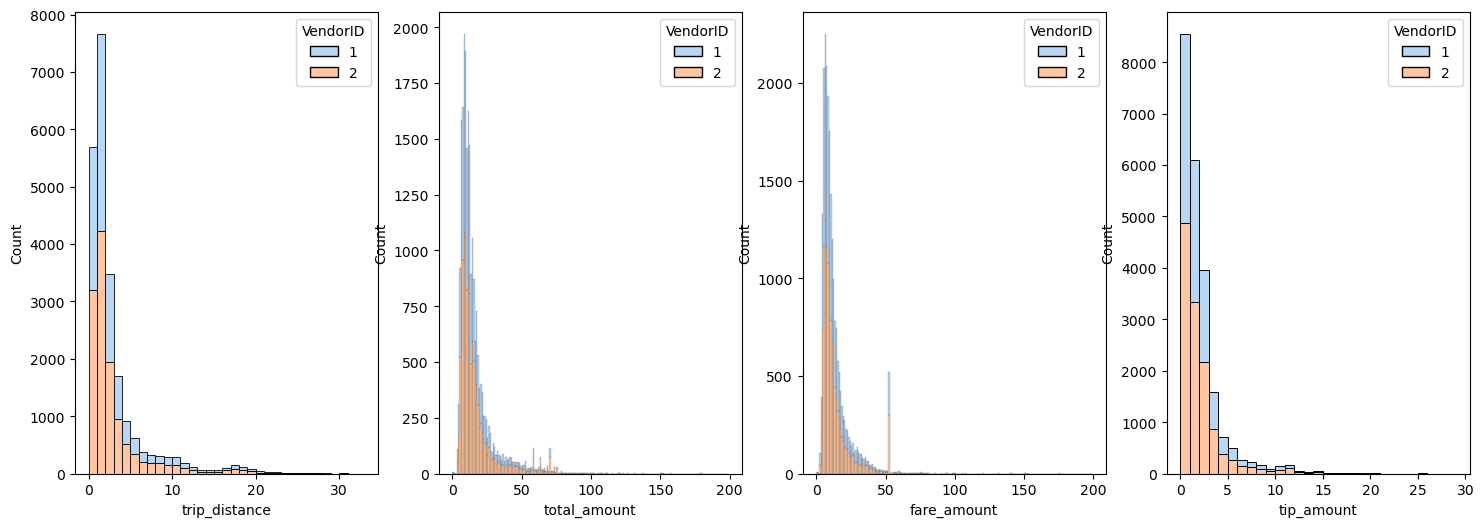

In [5]:
#Box Plots for some variables
fig, axes = plt.subplots(1, 4, figsize = (18,6))

sns.histplot(ax=axes[0],x=df['trip_distance'], bins=range(0,34,1),hue=df['VendorID'],multiple='stack',palette='pastel');
#axes[2,0].set_title('Trip Distance by vendor histogram');

sns.histplot(ax=axes[1],x=df['total_amount'], bins=range(0,200,1),hue=df['VendorID'],multiple='stack',palette='pastel')
#axes[2,1].set_title('Total Amount by vendor histogram')

sns.histplot(ax=axes[2],x=df['fare_amount'], bins=range(0,200,1),hue=df['VendorID'],multiple='stack',palette='pastel')
#axes[2,2].set_title('Fare Amount by vendor histogram')

sns.histplot(ax=axes[3],x=df['tip_amount'], bins=range(0,30,1),hue=df['VendorID'],multiple='stack',palette='pastel')
#axes[2,3].set_title('Tip Amount by vendor histogram')

#### ***Time Series analysis***

Text(0.5, 1.0, 'Hourly Revenue')

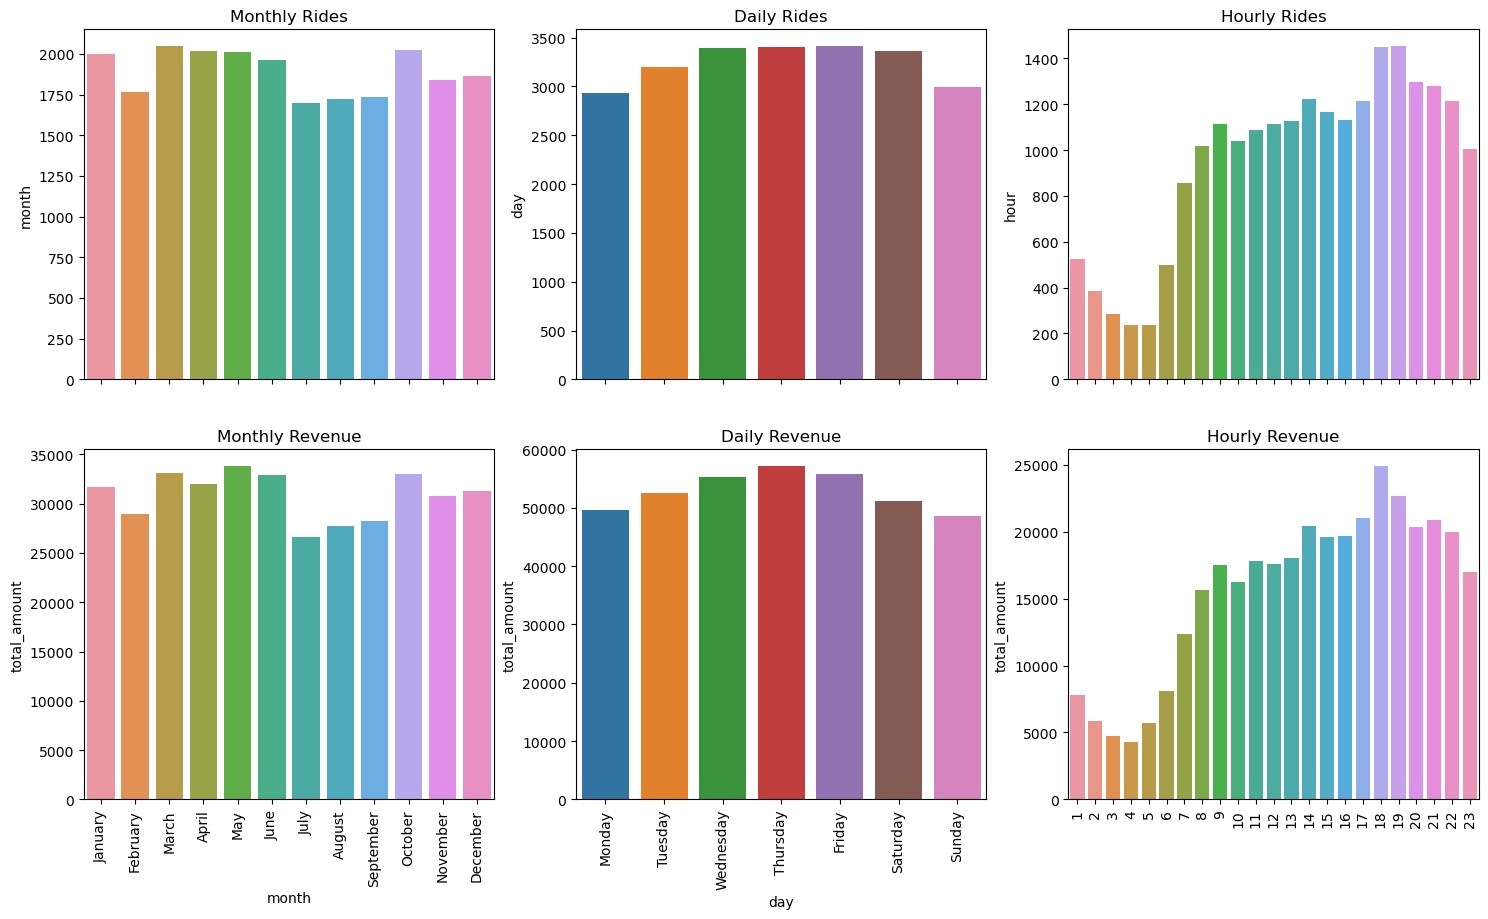

In [6]:
#****************Time Series Analysis********************************

#Box Plots for some variables
fig, axes1 = plt.subplots(2,3, figsize = (18,10))


# Convert data columns to datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

#Create new columns for Time series analysis
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
df['day'] = df['tpep_pickup_datetime'].dt.day_name()
df['hour'] = df['tpep_pickup_datetime'].dt.hour

#Find the Ride Duration
df['ride_duration'] =df['tpep_dropoff_datetime']- df['tpep_pickup_datetime']

#define the Time Series orders, Months, Days and Hours
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

hours = range(1,24)
hour_order=pd.Series(list(hours))

#Number of Rides per day and per month
#1. Monthly Rides
monthly_rides = df['month'].value_counts()
monthly_rides = monthly_rides.reindex(index=month_order)
sns.barplot(ax=axes1[0,0],x=monthly_rides.index,y=monthly_rides) 
#axes1[0,0].set_xticklabels(month_order,rotation=90)
axes1[0,0].set_xticklabels("")
axes1[0,0].set_title('Monthly Rides')


#2. Daily Rides
daily_rides = df['day'].value_counts()
daily_rides = daily_rides.reindex(index=day_order)
sns.barplot(ax=axes1[0,1],x=daily_rides.index,y=daily_rides) 
#axes1[0,1].set_xticklabels(daily_rides,rotation=90)
axes1[0,1].set_xticklabels("")
axes1[0,1].set_title('Daily Rides')

#3. Hourly Rides
hourly_rides = df['hour'].value_counts()
hourly_rides = hourly_rides.reindex(index=hour_order)
sns.barplot(ax=axes1[0,2],x=hourly_rides.index,y=hourly_rides) 
#axes1[0,2].set_xticklabels(hour_order,rotation=90);
axes1[0,2].set_xticklabels("");
axes1[0,2].set_title('Hourly Rides')


#4. Monthly Revenue
monthly_revenue = df.groupby('month').sum(numeric_only=True)[['total_amount']]
monthly_revenue = monthly_revenue.reindex(index=month_order)
sns.barplot(ax=axes1[1,0],x=monthly_revenue.index, y=monthly_revenue['total_amount']) 
axes1[1,0].set_xticklabels(month_order,rotation=90)
axes1[1,0].set_title('Monthly Revenue')

#5. Daily Revenue
daily_revenue = df.groupby('day').sum(numeric_only=True)[['total_amount']]
daily_revenue = daily_revenue.reindex(index=day_order)
sns.barplot(ax=axes1[1,1],x=daily_revenue.index, y=daily_revenue['total_amount']) 
axes1[1,1].set_xticklabels(day_order,rotation=90)
axes1[1,1].set_title('Daily Revenue')

#6. Hourly Revenue
hourly_revenue = df.groupby('hour').sum(numeric_only=True)[['total_amount']]
hourly_revenue = hourly_revenue.reindex(index=hour_order)
sns.barplot(ax=axes1[1,2],x=hourly_revenue.index, y=hourly_revenue['total_amount']) 
axes1[1,2].set_xticklabels(hour_order,rotation=90)
axes1[1,2].set_title('Hourly Revenue')



#monthly_rides = monthly_rides.reindex(index=month_order)
#sns.barplot(ax=axes1[0],x=monthly_rides.index,y=monthly_rides) 
#axes1[0].set_xticklabels(month_order,rotation=90)
#axes1[0].set_title('Monthly Rides')




#### ***Discrete variable analysis***

In [7]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

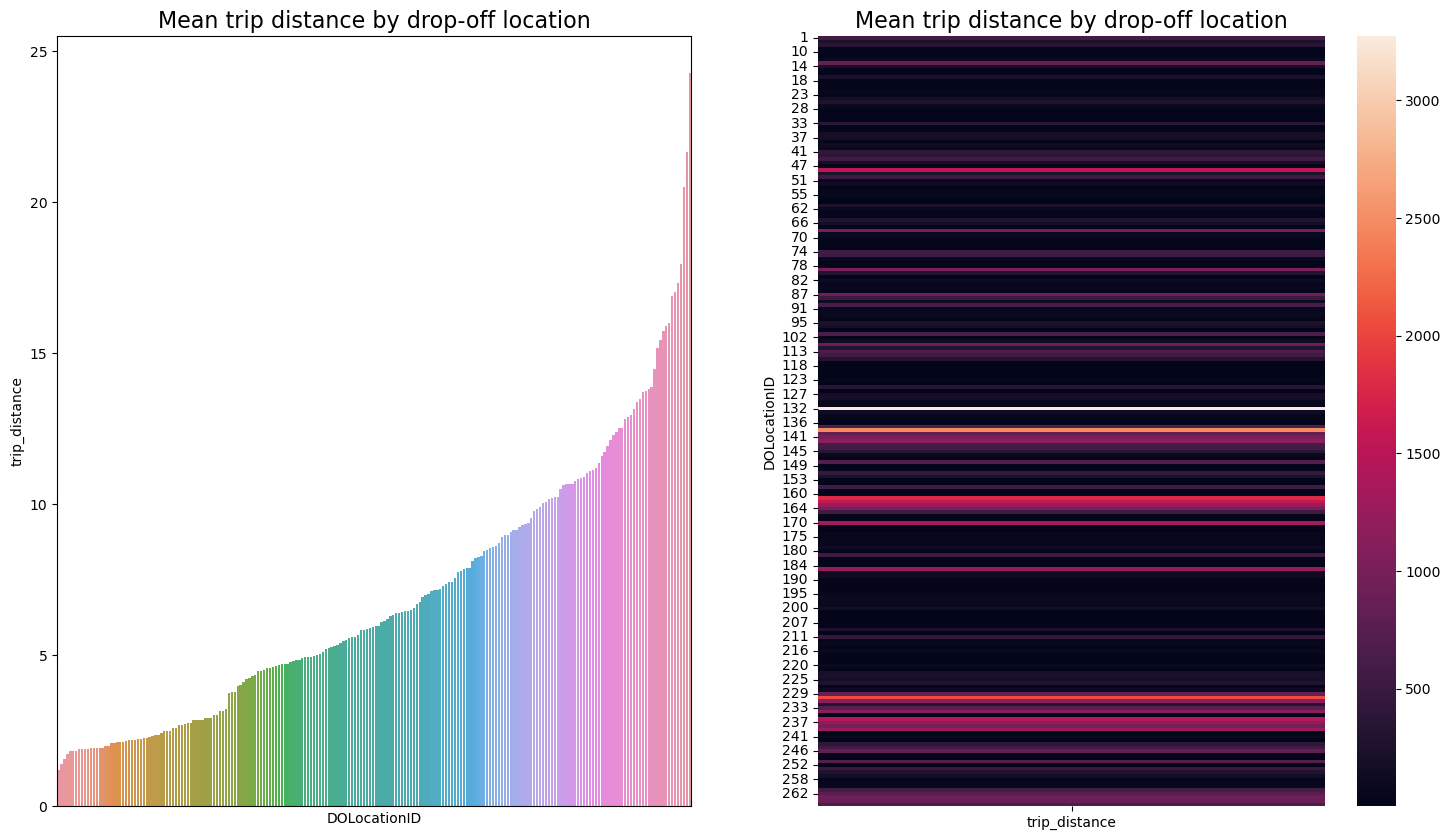

<Figure size 1400x600 with 0 Axes>

In [17]:
#Box Plots for some variables
fig, axes2 = plt.subplots(1,2, figsize = (18,10))


# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID').mean(numeric_only=True)[['trip_distance']]

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(14,6))
sns.barplot(ax=axes2[0],x=distance_by_dropoff.index, 
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index)
axes2[0].set_xticklabels([])
axes2[0].set_xticks([])
axes2[0].set_title('Mean trip distance by drop-off location', fontsize=16);


sumDistance_by_dropoff = df.groupby('DOLocationID').sum(numeric_only=True)[['trip_distance']]
#sumDistance_by_dropoff = sumDistance_by_dropoff.sort_values(by='trip_distance')
sns.heatmap(sumDistance_by_dropoff,ax=axes2[1])
axes2[1].set_title('Mean trip distance by drop-off location', fontsize=16);

### **PLAN_Task 6: Assessments of Tableau Measures and Dimensions**

### **ANALYZE_Task 4: Assessments of Tableau Measures and Dimensions**

### **PLAN_Task 7: Selecting for Visualization type**

### **ANALYZE_Task 5: Selecting for Visualization type**

### **CONSTRUCT_Task 1: Selecting for Visualization type**

### **ANALYZE_Task 6: Visualization Building**

### **CONSTRUCT_Task 2: Visualization Building**

### **PLAN_Task 8: Results and Evaluation**

### **EXECUTE_Task 2: Results and Evaluation**

### **ANALYZE_Task 7: Imports**

### **ANALYZE_Task 8: Statistical Tests**

### **CONSTRUCT_Task 3: Statistical Tests**

### **EXECUTE_Task 3: Communicate Insights with stakeholders**

### **PLAN_Task n:----------**

### **PLAN_Task n:----------**

### **PLAN: Outcomes**

1. Project Proposal
2. Project Strategy
3. ...

## **ANALYZE**

***Check if "total_amount" related to "trip_distance"***

In [ ]:
#sort the trip distance
df.sort_values(by=['trip_distance'],ascending=False)['trip_distance'] 

In [ ]:
#sort the total amount
df.sort_values(by=['total_amount'],ascending=False)['total_amount'] 

****Conclusion: The trip distance and total amount are not matching, maybe there are other variables that influence the total amout, e.g. Time of day, RateCode etc..****

***Check "payment_type" and "tip_amount"***

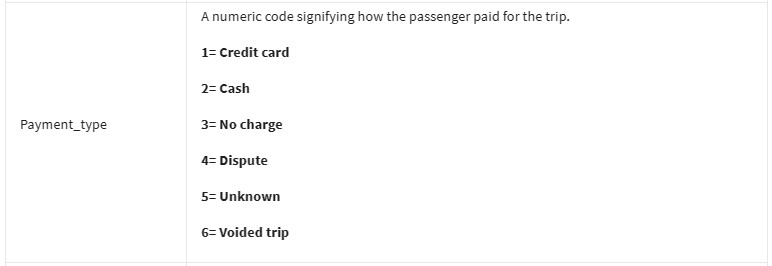

In [ ]:
df['payment_type'].value_counts()

In [ ]:
#check mean tip for credit card payments
print(df[(df['payment_type']==1)]['tip_amount'].mean())
#check mean tip for cash payments
print(df[(df['payment_type']==2)]['tip_amount'].mean())

***Check VendorID***

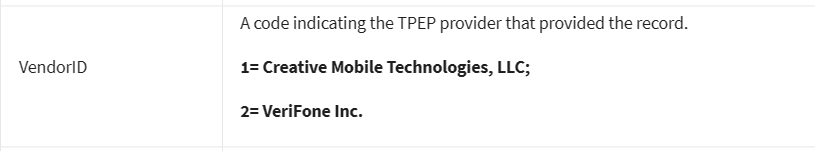

In [ ]:
print('1= Creative Mobile Technologies, LLC Mean Total amount =',df[(df['VendorID']==1)]['total_amount'].mean())
print('2= VeriFone Inc.                     Mean Total amount =',df[(df['VendorID']==2)]['total_amount'].mean())
print("\n")
print("Value counts for Vendors::\n",df['VendorID'].value_counts())

# How many times is each vendor ID represented in the data?

***Check Data for Credit Card payment only***

In [ ]:
# Filter the data for credit card payments only
credit_card_df= df[(df['payment_type']==1)]
print(df[(df['payment_type']==1)].head(10))

***Check data for Credit Card only and Passanger Count***

In [ ]:
# Filter the data for passenger count only
#print(df['passenger_count'].value_counts())

print(df[(df['payment_type']==1)]['passenger_count'].value_counts())

 ***Check average tip amount for each passenger count (credit card payments only)***

In [ ]:
# Calculate the average tip amount for each passenger count (credit card payments only)

credit_card_df.groupby(['passenger_count']).mean(numeric_only=True)[['tip_amount']]

### **ANALYZE: Outcomes**

***1) Variable Selection : <Which variables are important for this project?>***

## **CONSTRUCT**

## **EXECUTE**